This is a tutorial for the [```pirel```](https://github.com/giumc/pirel) Python3 module.

```pirel``` stands for PIezoelectric REsonator Layout, and it is based on the module [```phidl```](https://github.com/amccaugh/phidl)


***There are four packages within ```pirel```*** : ```pcells``` , ```modifiers``` , ```sweeps``` and ```tools``` . Let's start with ```pcells```.

In [54]:
import pirel.pcells as pc

```pcells``` is a collection of classes that are commonly required in piezoelectric resonator design.
all the cells defined here are derived from ```pirel.tools.LayoutPart``` so they share :

* ```name``` attribute 
* ```import_params``` method
* ```export_params``` method
* ```view``` method

An example of layout class is the Interdigitated Finger Pair ```pc.IDT```.

In [55]:
idt=pc.IDT(name='TutorialIDT')

You can get the parameters available to ```idt``` by printing the ```dict``` in output from ```export_params()```

In [56]:
idt_params=idt.export_params()
idt_params

{'Name': 'TutorialIDT',
 'Length': 200.0,
 'Pitch': 8.0,
 'YOffset': 10.0,
 'Coverage': 0.7,
 'N': 40,
 'Layer': 2,
 'ActiveAreaMargin': 0.5,
 'Type': 'IDT'}

you can modify any of the parameters and then import them in the cell

In [57]:
idt_params["N"]=10
idt.import_params(idt_params)
idt.export_params()

{'Name': 'TutorialIDT',
 'Length': 200.0,
 'Pitch': 8.0,
 'YOffset': 10.0,
 'Coverage': 0.7,
 'N': 10,
 'Layer': 2,
 'ActiveAreaMargin': 0.5,
 'Type': 'IDT'}

At any point, you can visualize the layout cell by calling ```view()```

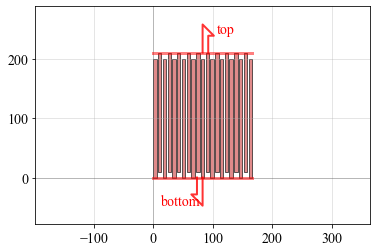

In [58]:
idt.view()

the output is showing a ```phidl.Device``` . These ```Device``` instances are powered up versions of ```gdspy.Cell``` instances.

Refer to [```phidl```](https://github.com/amccaugh/phidl) if you want to learn how many cool things you can do with them.

you can explicitly get this ```Device``` instance by calling the ```draw()``` method.

At that point, you can play around with the cells by using the powerful tools in ```phidl```.

In this example, we will align and distribute two ```idt``` cells using the ```phidl``` module.

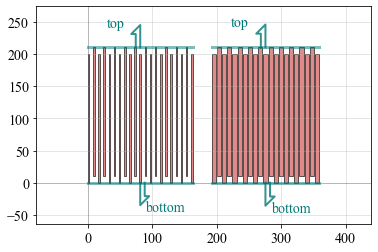

In [59]:
idt.coverage=0.3
cell1=idt.draw()
idt.coverage=0.8 ### yes you can set attributes like this, but you will have to find variable names from typing help(idt)
cell2=idt.draw()

import phidl
import phidl.device_layout as dl
from phidl import quickplot as qp

g=dl.Group([cell1,cell2])
g.distribute(direction='x',spacing=30)
g.align(alignment='y')

cell_tot=phidl.Device()
cell_tot<<cell1
cell_tot<<cell2

qp(cell_tot)

Feel free to look at ```help(pc)``` to figure out all the classes implemented in this module.

I will add a *developer guide* for whoever wants to create new classes.

Some classes in ``pc`` are created by subclassing , some other by composition of *unit* classes. 
For example, a Lateral Field Excitation RESonator (```pc.LFERes```) is built starting from some components:

* ```pc.IDT```
* ```pc.Bus```
* ```pc.EtchPit```
* ```pc.Anchor```

For any class in ```pc```, you can find components by querying the ```get_components()``` method:

In [60]:
via=pc.Via(name='TutorialVia')
res=pc.LFERes(name='TutorialLFERes')

In [61]:
via.get_components()

{}

In [62]:
res.get_components()

{'IDT': pirel.pcells.IDT,
 'Bus': pirel.pcells.Bus,
 'EtchPit': pirel.pcells.EtchPit,
 'Anchor': pirel.pcells.Anchor}

Note that ```via``` has no components, ```res``` has four of them.

All layout parameters of each component is also a layout parameter of the composed class.

For example, this is the list of parameters that define ```LFERes```.

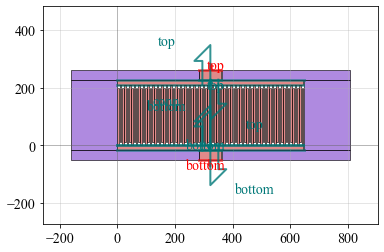

{'IDTLength': 200.0,
 'IDTPitch': 8.0,
 'IDTYOffset': 10.0,
 'IDTCoverage': 0.7,
 'IDTN': 40,
 'IDTLayer': 2,
 'IDTActiveAreaMargin': 0.5,
 'BusLayer': 2,
 'BusSizeY': 16.0,
 'EtchPitX': 160.0,
 'EtchPitLayer': 4,
 'AnchorSizeX': 80.0,
 'AnchorSizeY': 32.0,
 'AnchorMetalizedX': 76.0,
 'AnchorMetalizedY': 36.0,
 'AnchorLayer': 2,
 'AnchorEtchLayer': 4,
 'Name': 'TutorialLFERes',
 'Type': 'LFERes'}

In [63]:
lfe_params=res.export_params()
res.view()
lfe_params

Some classes have also parameters of their own : 
the class ```FBERes``` (Floating Bottom Electrode Resonators) has a string that sets the margin of the floating bottom electrode:

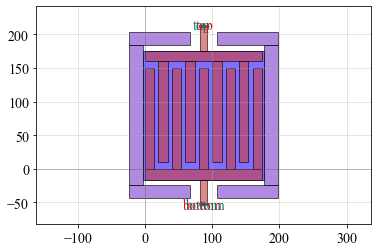

In [64]:
fbe=pc.FBERes(name="TutorialFBE")
params=fbe.export_params();

params["IDTN"]=4
params["IDTLength"]=150
params["IDTPitch"]=20
params["EtchPitX"]=20
params["AnchorSizeX"]=40
params["AnchorMetalizedX"]=10
params["AnchorSizeY"]=20
params["PlatePosition"]='in, long'

fbe.import_params(params)
fbe.view()

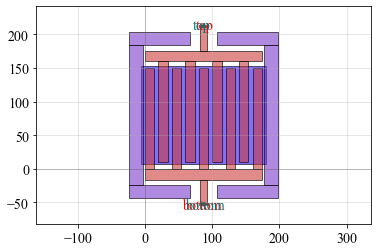

In [65]:
params["PlatePosition"]='out, short'
fbe.import_params(params)
fbe.view()